In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [7]:
data = pd.read_csv('C:/Users/user/Desktop/wadada/data/SEOUL.csv')

In [8]:
data = data.groupby('상권_코드_명').mean().reset_index()

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
data_ = data.iloc[:, 4:]
scaled_data = scaler.fit_transform(data_)

In [79]:
data_final = scaled_data[:, :-1]

In [18]:
from sklearn.cluster import KMeans

In [19]:
from itertools import combinations

In [22]:
import warnings
warnings.filterwarnings(action='ignore')

In [23]:
from sklearn import metrics

pca = PCA()
pca_data = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df_final)
labels = kmeans.labels_
score = metrics.silhouette_score(pca_data[:, :3], labels, metric='euclidean')

In [34]:
cols = data.columns[4:-1]

In [38]:
from sklearn import metrics

def test(X, n_cluster):
    
    pca = PCA()
    pca_data = pca.fit_transform(X)
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init="auto").fit(X)
    labels = kmeans.labels_

    score = metrics.silhouette_score(pca_data[:, :3], labels, metric='euclidean')
    
    return score

def test_plot(X, columns, n_cluster):
    
    pca = PCA()
    pca_data = pca.fit_transform(X)
    
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    loading_matrix = pd.DataFrame(loadings)
    loading_matrix = loading_matrix.iloc[:, :3]

    loading_matrix.columns = ['PC1', 'PC2', 'PC3']
    loading_matrix.index = cols[list(columns)]
        
    kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init="auto").fit(X)
    labels = kmeans.labels_
    
    plt.figure(figsize=[15,15])

    plt.subplot(2, 2, 1)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.subplot(2, 2, 2)
    plt.scatter(pca_data[:, 0], pca_data[:, 2], c=labels)
    plt.xlabel('PC1')
    plt.ylabel('PC3')

    plt.subplot(2, 2, 3)
    plt.scatter(pca_data[:, 1], pca_data[:, 2], c=labels)
    plt.xlabel('PC2')
    plt.ylabel('PC3')

    plt.show()
    
    score = metrics.silhouette_score(pca_data[:, :3], labels, metric='euclidean')
    
    return loading_matrix, labels, score

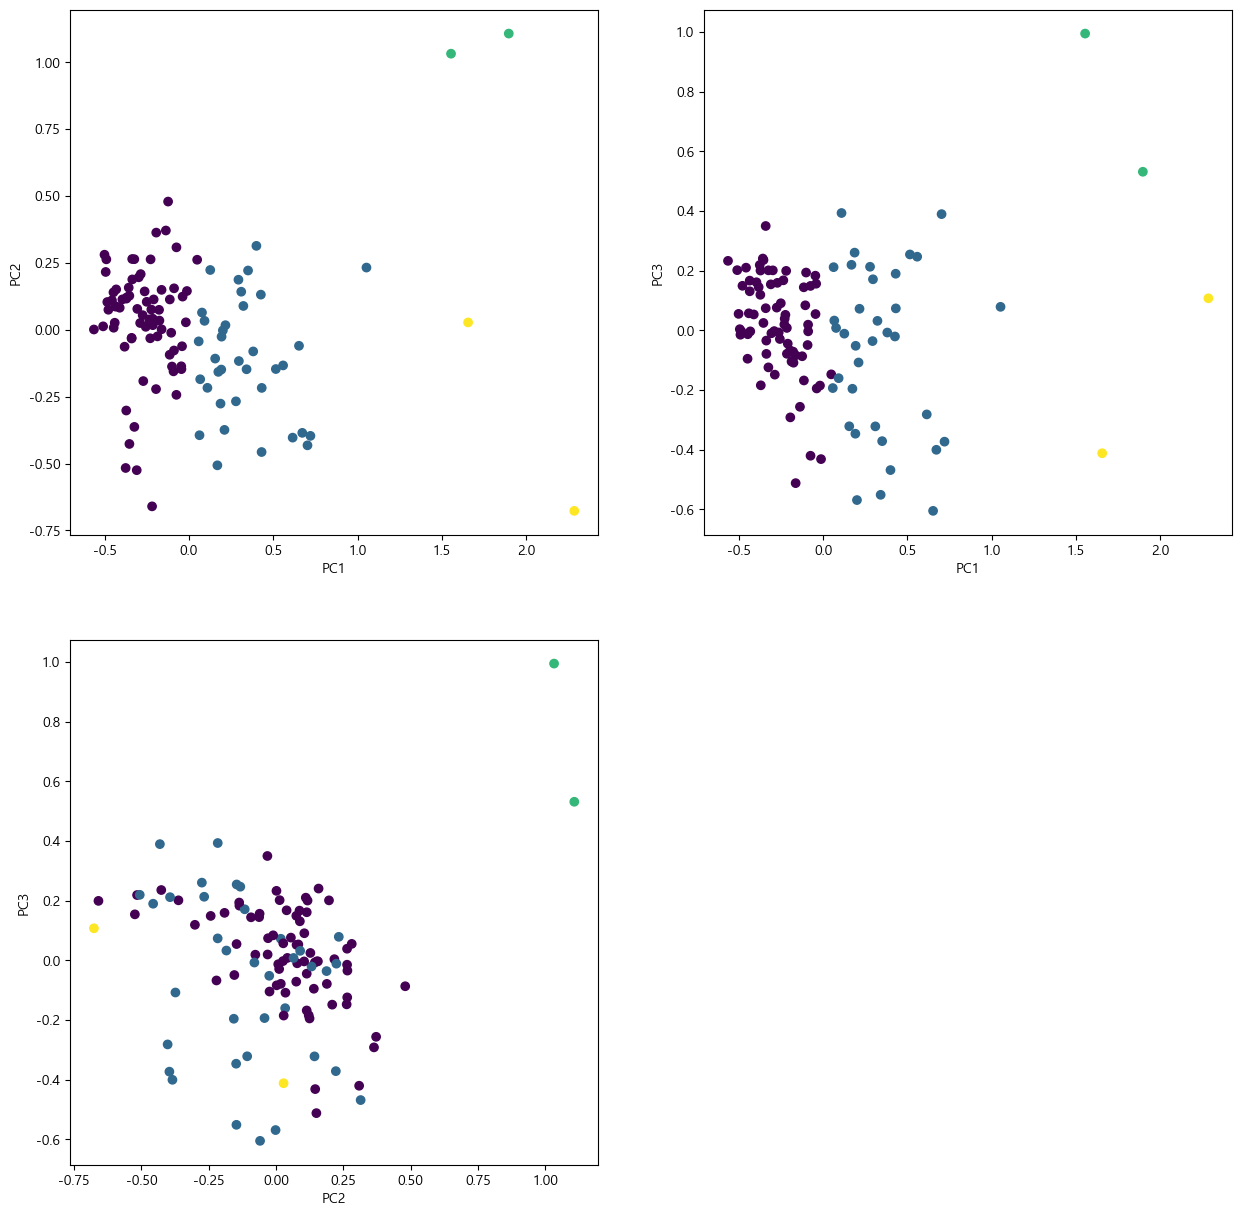

(                      PC1       PC2       PC3
 점포_수             0.172881 -0.031643 -0.042963
 유사_업종_점포_수       0.168289 -0.034535 -0.040834
 개업_율            -0.055035 -0.031823  0.052061
 폐업_율            -0.075067 -0.065059  0.110389
 주중_매출_금액         0.100339  0.039463  0.018512
 주말_매출_금액         0.083044  0.039104  0.048427
 남성_매출_금액         0.113801  0.052749  0.038242
 여성_매출_금액         0.162069  0.027519  0.045158
 연령대_10_매출_금액     0.096757 -0.034112  0.060471
 연령대_20_매출_금액     0.112575 -0.017737  0.039442
 연령대_30_매출_금액     0.152427  0.029254  0.035064
 연령대_40_매출_금액     0.099982  0.046064  0.024883
 연령대_50_매출_금액     0.108566  0.051936  0.033350
 연령대_60_이상_매출_금액  0.078077  0.048777  0.037617
 집객시설_수           0.117506 -0.056996 -0.015312
 교통_인프라           0.068903 -0.014186 -0.010331
 총 상주인구 수         0.017389 -0.155539  0.029977
 총_직장_인구_수        0.118465 -0.030173 -0.121406
 총_생활인구_수         0.083551 -0.140808  0.027870
 월_평균_소득_금액       0.035710 -0.014520 -0.076629,
 array([0, 0

In [80]:
test_plot(data_final, range(len(cols)), 4)

In [83]:
def repeat_cls(num, cls_num):
    lst = list(combinations(pd.DataFrame(data_final).columns, num))

    results = [None] * len(lst)

    for i in range(len(lst)):
        result = test(data_final[:, lst[i]], cls_num)
        results[i] = result
        if i%100==0:
            print(i,'/', len(lst))
            
    idx_max = pd.Series(results).argmax()
    loading, labels, score = test_plot(data_final[:, lst[idx_max]], lst[idx_max], cls_num)
    
            
    return lst, results, loading, labels, score

0 / 190
100 / 190


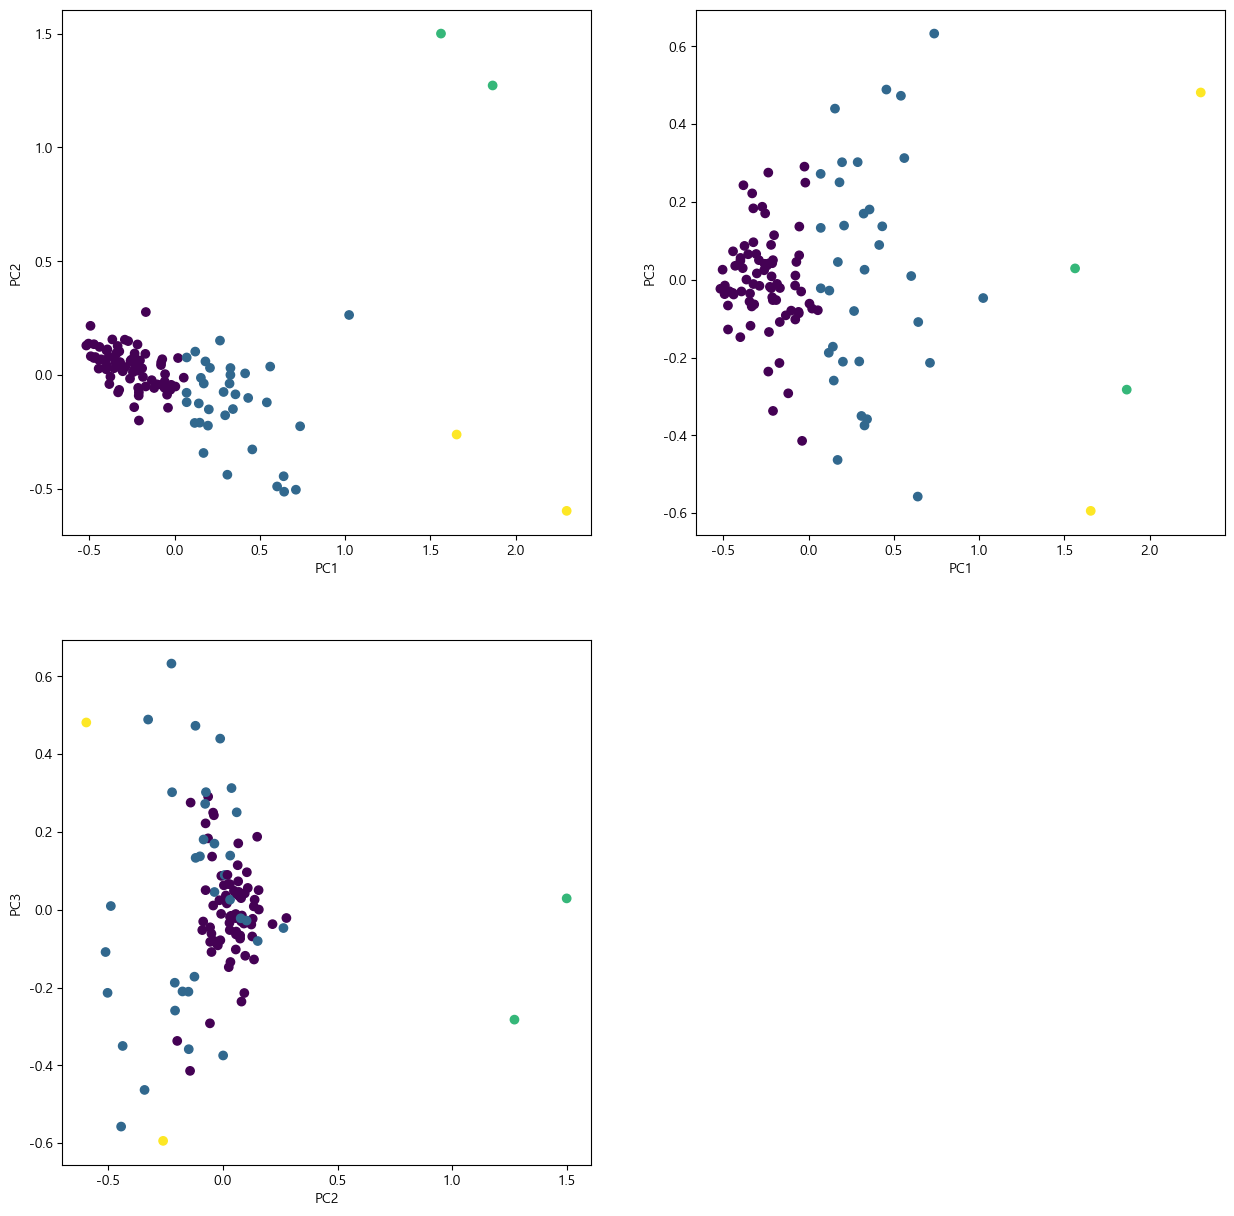

([(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19),
  (0, 1, 2

In [84]:
repeat_cls(18, 4)

In [ ]:
repeat_cls(18, 4)